In [2]:
import numpy as np
import scipy
from sympy import *
import matplotlib.pyplot as plt
%matplotlib widget
init_printing(use_unicode=True)

In [3]:
x, y, theta1, theta2 = symbols('x y theta1 theta2')

eqs = [
    Eq(x, 1-(theta1**2)/4 + (theta2**2)/4),
    Eq(y, sqrt(theta1**2 - (theta1**4)/16) - sqrt(theta2**2 - (theta2**4)/16)),
]

vars = [theta1, theta2]

sol = solve(eqs, vars, set=True)


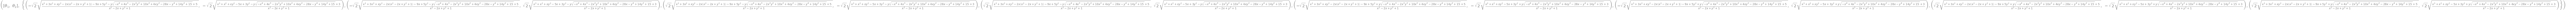

In [4]:
sol

In [5]:
sol_list = []
for item in sol[1]:
    sol_list.append(item)

In [22]:
x_val = 1.5
y_val = -3.874
for sol_num in range(len(sol_list)):
    theta1_expr = sol_list[sol_num][0]
    theta2_expr = sol_list[sol_num][1]
    theta1_val = theta1_expr.subs({x:x_val, y:y_val})
    theta2_val = theta2_expr.subs({x:x_val, y:y_val})
    print(f"sol {sol_num}:  θ1 = {N(theta1_val)}, θ2 = {N(theta2_val)}")

sol 0:  θ1 = -2.95106065335941, θ2 = 3.27242402200664
sol 1:  θ1 = -2.95106065335941, θ2 = -3.27242402200664
sol 2:  θ1 = 2.95106065335941, θ2 = 3.27242402200664
sol 3:  θ1 = 2.30026977117770, θ2 = 2.70022980877441
sol 4:  θ1 = -2.30026977117770, θ2 = 2.70022980877441
sol 5:  θ1 = 2.95106065335941, θ2 = -3.27242402200664
sol 6:  θ1 = 2.30026977117770, θ2 = -2.70022980877441
sol 7:  θ1 = -2.30026977117770, θ2 = -2.70022980877441


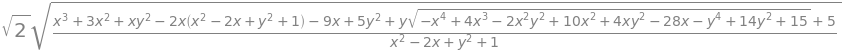

In [23]:
theta1 = sol_list[3][0]
theta1

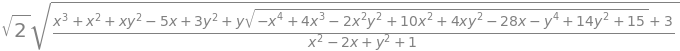

In [24]:
theta2 = sol_list[3][1]
theta2

In [25]:
t = symbols('t')

theta1_expr = sol_list[3][0]
theta2_expr = sol_list[3][1]

traj1_theta1 = theta1_expr.subs({x: 1, y: t-2*sqrt(3)})
traj1_theta2 = theta2_expr.subs({x: 1, y: t-2*sqrt(3)})

traj2_theta1 = theta1_expr.subs({x: 2-t, y: 1-2*sqrt(3)})
traj2_theta2 = theta2_expr.subs({x: 2-t, y: 1-2*sqrt(3)})

traj3_theta1 = theta1_expr.subs({x: 0, y: -t+3-2*sqrt(3)})
traj3_theta2 = theta2_expr.subs({x: 0, y: -t+3-2*sqrt(3)})


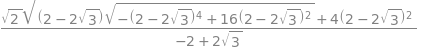

In [26]:
traj1_theta1.subs(t, 2)

In [38]:
def forward_kine(theta1, theta2):
    x = 1 - (1/4)*theta1**2 + (1/4)*theta2**2 
    y = -sqrt(theta1**2 - (1/16)*theta1**4) - sqrt(theta2**2 - (1/16)*theta2**4)
    return x, y

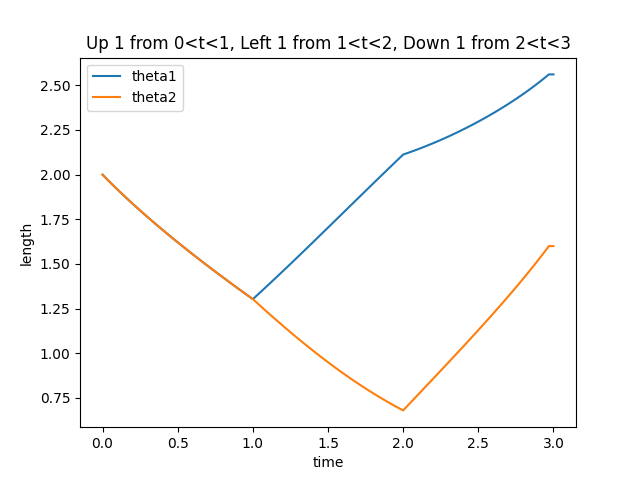

In [40]:
plt.cla()
plt.figure()

ts = np.linspace(0, 3, num=100)
theta1s = []
theta2s = []

xs = []
ys = []

# Eq(x, 1-(theta1**2)/4 + (theta2**2)/4),
#     Eq(y, sqrt(theta1**2 - (theta1**4)/16) - sqrt(theta2**2 - (theta2**4)/16)),

for t_val in ts:
    if(t_val < 1):
        theta1_val = traj1_theta1.subs({t: t_val})
        theta2_val = traj1_theta2.subs({t: t_val})
    elif(t_val < 2):
        theta1_val = traj2_theta1.subs({t: t_val})
        theta2_val = traj2_theta2.subs({t: t_val})
    elif(t_val < 3):
        theta1_val = traj3_theta1.subs({t: t_val})
        theta2_val = traj3_theta2.subs({t: t_val})
    # print(N(theta1_val))
    theta1s.append(N(theta1_val))
    theta2s.append(N(theta2_val))

    x_new, y_new = forward_kine(theta1=N(theta1_val), theta2=N(theta2_val))
    xs.append(x_new)
    ys.append(y_new)

plt.plot(ts, theta1s, label='theta1')
plt.plot(ts, theta2s, label='theta2')
plt.xlabel('time')
plt.ylabel('length')
plt.title('Up 1 from 0<t<1, Left 1 from 1<t<2, Down 1 from 2<t<3')
plt.legend()
plt.show()
    

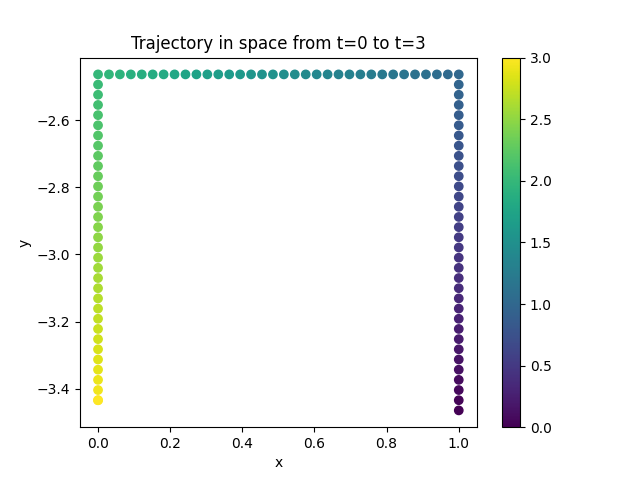

In [44]:
plt.figure()
plt.scatter(xs, ys, c=ts)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory in space from t=0 to t=3')
plt.show()

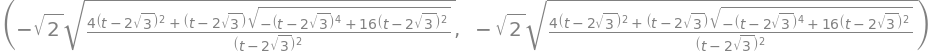

In [12]:
#up by 1 unit from t=0 to t=1
(traj1_theta1, traj1_theta2)

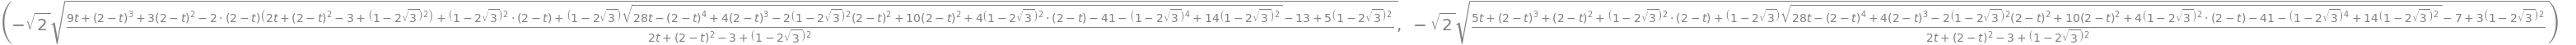

In [13]:
#left by 1 unit from t=1 to t=2
(traj2_theta1, traj2_theta2)

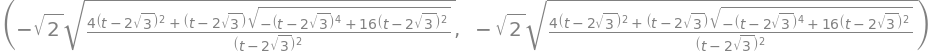

In [14]:
#down by 1 unit from t=2 to t=3
(traj1_theta1, traj1_theta2)